### Credit Card Fraud Simpler Example
* Source Blog: https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8
* Source Code: https://github.com/lksfr/credit_card_fraud/blob/master/creditcardfraud.ipynb
* Source Data: https://www.kaggle.com/mlg-ulb/creditcardfraud

The data set contains 284,807 transactions with 31 features, 28 of which have been anonymized and are labeled V1 through V28. The remaining three features are the time and the amount of the transaction as well as whether that transaction was fraudulent or not. Before it was uploaded to Kaggle, the anonymized variables had been modified in the form of a PCA (Principal Component Analysis). Furthermore, there were no missing values in the data set. 

#### Exploratory Data Analysis (EDA)


In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('creditcard.csv')
df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
152314   97253.0  1.874764  0.746440 -1.708627  3.496297  1.937597  1.246998   
182480  125416.0 -0.214134  1.660982 -1.234707  0.564877  1.414521 -0.342755   
163517  116001.0 -0.133056  0.168153 -0.696242 -1.636197  0.872091 -0.658902   
191211  129160.0  1.754634 -0.686381 -0.770448  0.574467 -0.971058 -1.495476   
207943  136901.0 -1.870973 -6.637612 -4.302310  1.358796 -0.693332  1.819930   

              V7        V8        V9  ...       V21       V22       V23  \
152314  0.460138  0.107666 -0.458621  ...  0.079521  0.536119  0.016514   
182480  1.157495  0.193914 -1.479052  ...  0.344641  1.093838 -0.235726   
163517  1.302623 -0.473561 -1.449989  ... -0.157408  0.354322 -0.106449   
191211  0.068038 -0.239993  1.278655  ... -0.054230 -0.227269  0.254056   
207943  2.621323 -0.245996 -0.079116  ...  1.341615 -0.517380 -1.646694   

             V24       V25       V26       V27       V28   Amount  Class  
152314 -1.710133  0.175064  0.218075 -0.070169 -0.101815     4.10      0  
182480  0.323775 -0.235081 -0.411153  0.351417  0.223251     1.70      0  
163517  0.740994 -0.673001  0.574210  0.136275  0.027904    62.50      0  
191211  0.844900 -0.296508 -0.146532 -0.052294 -0.031695   116.24      0  
207943 -0.791719 -0.794701  0.565212 -0.442638  0.250713  2000.36      0  

[5 rows x 31 columns]

In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

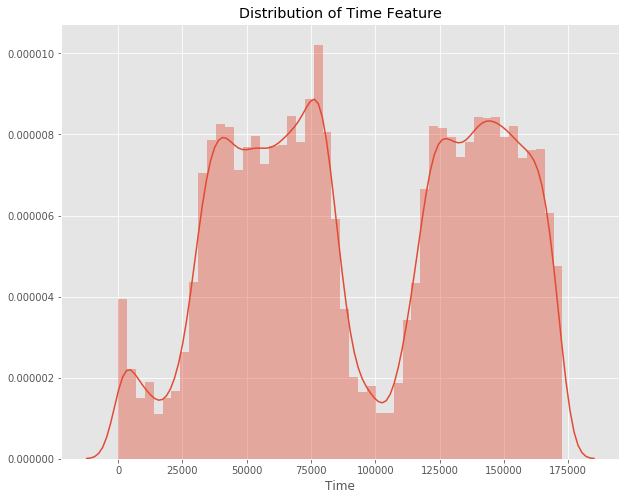

In [6]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

The time is recorded in the number of seconds since the first transaction in the data set. Therefore, we can conclude that this data set includes all transactions recorded over the course of two days. As opposed to the distribution of the monetary value of the transactions, it is bimodal. This indicates that approximately 28 hours after the first transaction there was a significant drop in the volume of transactions. While the time of the first transaction is not provided, it would be reasonable to assume that the drop in volume occurred during the night.

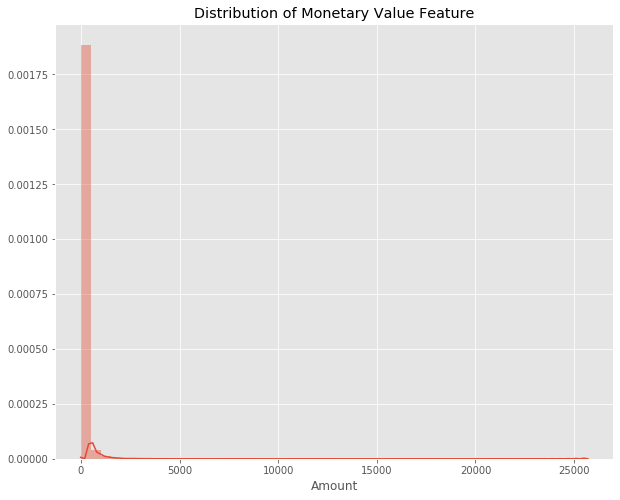

In [7]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

The mean value of all transactions is USD88.35 while the largest transaction recorded in this data set amounts to $25,691.16. However, as you might be guessing right now based on the mean and maximum, the distribution of the monetary value of all transactions is heavily right-skewed. The vast majority of transactions are relatively small and only a tiny fraction of transactions comes even close to the maximum.

* What about the class distributions? 
* How many transactions are fraudulent and how many are not?

In [8]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


As can be expected, most transactions are non-fraudulent. In fact, 99.83% of the transactions in this data set were not fraudulent while only 0.17% were fraudulent. The following visualization underlines this significant contrast. Lets visualise this class imbalance.

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

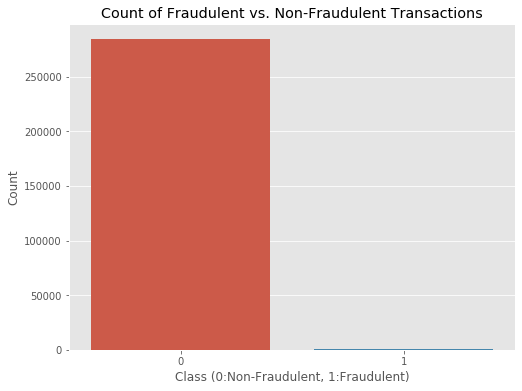

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [10]:
# Checking correlations between variables
corr = df.corr()
corr

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.697e-17 -1.424e-15  1.755e-17  6.391e-17   
V2     -0.011  4.697e-17  1.000e+00  2.512e-16 -1.126e-16 -2.040e-16   
V3     -0.420 -1.424e-15  2.512e-16  1.000e+00 -3.417e-16 -1.437e-15   
V4     -0.105  1.755e-17 -1.126e-16 -3.417e-16  1.000e+00 -1.941e-15   
V5      0.173  6.391e-17 -2.040e-16 -1.437e-15 -1.941e-15  1.000e+00   
V6     -0.063  2.398e-16  5.025e-16  1.432e-15 -2.713e-16  7.926e-16   
V7      0.085  1.992e-15  3.966e-16  2.169e-15  1.556e-16 -4.210e-16   
V8     -0.037 -9.491e-17 -4.414e-17  3.433e-16  5.196e-16  7.589e-16   
V9     -0.009  2.170e-16 -5.729e-17 -4.234e-16  3.860e-16  4.205e-16   
V10     0.031  7.434e-17 -4.782e-16  6.289e-16  6.055e-16 -6.602e-16   
V11    -0.248  2.439e-16  9.469e-16 -5.502e-17 -2.084e-16  7.343e-16   
V12     0.124  2.422e-16 -6.588e-16  2.207e-16 -5.658e-16  3.761e-16   
V13    -0.066 -2.115e-16  3.855e-16 -6.883e-16 -1.506e-16 -9.579e-16   
V14    -0.099  9.353e-16 -2.541e-16  4.271e-16 -8.522e-17 -3.635e-16   
V15    -0.183 -3.252e-16  2.831e-16  1.123e-16 -1.508e-16 -5.133e-16   
V16     0.012  6.309e-16  4.934e-17  1.183e-15 -6.939e-16 -3.517e-16   
V17    -0.073 -5.012e-16 -9.883e-16  4.577e-17 -4.398e-16  1.426e-16   
V18     0.090  2.870e-16  2.637e-16  5.428e-16  1.494e-16  1.110e-15   
V19     0.029  1.818e-16  9.528e-17  2.577e-16 -2.657e-16 -3.138e-16   
V20    -0.051  1.037e-16 -9.310e-16 -9.429e-16 -3.223e-16  2.076e-16   
V21     0.045 -1.755e-16  8.444e-17 -2.972e-17 -9.977e-17 -1.369e-16   
V22     0.144  7.477e-17  2.501e-16  4.648e-16  2.100e-16  5.060e-16   
V23     0.051  9.809e-16  1.060e-16  2.115e-17  6.003e-17  1.638e-16   
V24    -0.016  7.354e-17 -8.142e-18 -9.352e-17  2.230e-16 -9.286e-16   
V25    -0.233 -9.805e-16 -4.262e-17  4.771e-16  5.395e-16  5.625e-16   
V26    -0.041 -8.622e-17  2.602e-16  6.522e-16 -6.180e-16  9.145e-16   
V27    -0.005  3.208e-17 -4.478e-16  6.240e-16 -6.403e-17  4.466e-16   
V28    -0.009  9.821e-16 -3.676e-16  7.727e-16 -5.864e-17 -3.299e-16   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9  ...        V21        V22  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03  ...  4.474e-02  1.441e-01   
V1      2.398e-16  1.992e-15 -9.491e-17  2.170e-16  ... -1.755e-16  7.477e-17   
V2      5.025e-16  3.966e-16 -4.414e-17 -5.729e-17  ...  8.444e-17  2.501e-16   
V3      1.432e-15  2.169e-15  3.433e-16 -4.234e-16  ... -2.972e-17  4.648e-16   
V4     -2.713e-16  1.556e-16  5.196e-16  3.860e-16  ... -9.977e-17  2.100e-16   
V5      7.926e-16 -4.210e-16  7.589e-16  4.205e-16  ... -1.369e-16  5.060e-16   
V6      1.000e+00  1.429e-16 -1.707e-16  1.114e-16  ... -1.576e-16 -3.363e-16   
V7      1.429e-16  1.000e+00 -8.692e-17  7.933e-16  ...  1.939e-16 -1.058e-15   
V8     -1.707e-16 -8.692e-17  1.000e+00  2.901e-16  ... -2.412e-16  5.476e-16   
V9      1.114e-16  7.933e-16  2.901e-16  1.000e+00  ...  4.578e-17  2.872e-17   
V10     2.851e-16  3.043e-17  9.052e-17 -2.772e-16  ...  8.090e-16 -6.708e-16   
V11     4.866e-16 -1.084e-15  1.955e-16  4.682e-16  ... -3.912e-16 -3.812e-17   
V12     2.141e-16  1.510e-15 -6.266e-17 -2.445e-15  ...  3.230e-16 -5.904e-16   
V13    -2.268e-16 -9.892e-17 -2.383e-16 -2.650e-16  ...  9.499e-17 -2.660e-17   
V14     3.453e-16 -1.729e-16 -1.131e-16  2.343e-16  ...  1.634e-17  3.440e-16   
V15    -6.368e-18  1.937e-17  2.021e-16 -1.588e-15  ...  1.947e-17 -8.937e-16   
V16    -2.478e-16  2.894e-16  5.027e-16 -3.252e-16  ... -3.927e-16  3.878e-17   
V17     3.568e-16  1.150e-15 -3.509e-16  6.536e-16  ... -7.754e-16 -8.390e-16   
V18     2.811e-16 -1.117e-16 -4.094e-16  1.204e-16  ... -1.141e-15 -8.663e-17   
V19     2.717e-16 -2.874e-16 -5.340e-16  1.121e-16  ...  4.033e-16 -9.690e-16   
V20

Text(0.5, 1, 'Heatmap of Correlation')

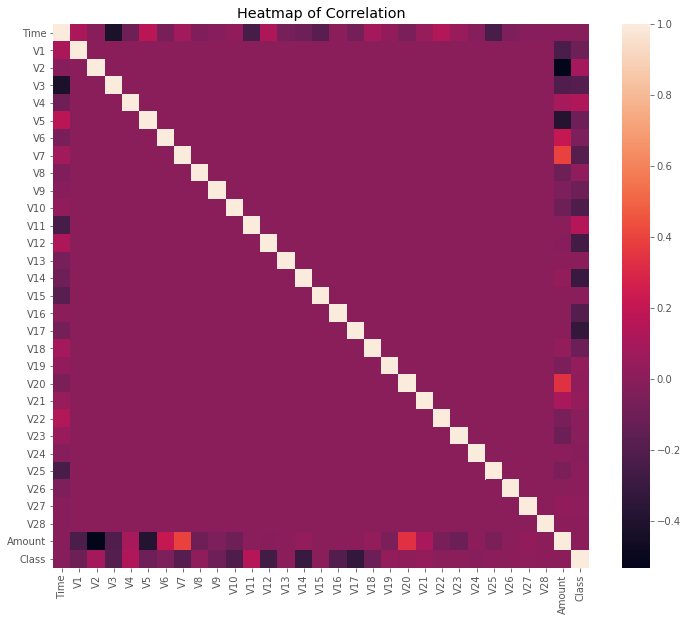

In [11]:
# Visualizing correlations as a heatmap
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

As you can see, some of our predictors do seem to be correlated with the class variable. Nonetheless, there seem to be relatively little significant correlations for such a big number of variables. This can probably be attributed to two factors:
1. The data was prepared using a PCA, therefore our predictors are principal components.
2. The huge class imbalance might distort the importance of certain correlations with regards to our class variable.

In [12]:
# Check skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

### Data Preparation

Before continuing with our analysis, it is important not to forget that while the anonymized features have been scaled and seem to be centered around zero, our time and amount features have not. Not scaling them as well would result in certain machine learning algorithms that give weights to features (logistic regression) or rely on a distance measure (KNN) performing much worse. To avoid this issue, I standardized both the time and amount column. Luckily, there are no missing values and we, therefore, do not need to worry about missing value imputation.

#### Creating a Training Set for a Heavily Imbalanced Data Set
Now comes the challenging part: Creating a training data set that will allow our algorithms to pick up the specific characteristics that make a transaction more or less likely to be fraudulent. Using the original data set would not prove to be a good idea for a very simple reason: Since over 99% of our transactions are non-fraudulent, an algorithm that always predicts that the transaction is non-fraudulent would achieve an accuracy higher than 99%. Nevertheless, that is the opposite of what we want. We do not want a 99% accuracy that is achieved by never labeling a transaction as fraudulent, we want to detect fraudulent transactions and label them as such.

There are two key points to focus on to help us solve this. First, we are going to utilize random under-sampling to create a training dataset with a balanced class distribution that will force the algorithms to detect fraudulent transactions as such to achieve high performance. Speaking of performance, we are not going to rely on accuracy. 

Instead, we are going to make use of the Receiver Operating Characteristics-Area Under the Curve or ROC-AUC performance measure. Essentially, the ROC-AUC outputs a value between zero and one, whereby one is a perfect score and zero the worst. If an algorithm has a ROC-AUC score of above 0.5, it is achieving a higher performance than random guessing.

To create our balanced training data set, I took all of the fraudulent transactions in our data set and counted them. Then, I randomly selected the same number of non-fraudulent transactions and concatenated the two. After shuffling this newly created data set, author decided to output the class distributions once more to visualize the difference.

#### Scaling Amount and Time

In [13]:
# import required libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [14]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [15]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
130477  79362.0  1.183 -0.503  0.752 -0.962 -0.863  0.143 -0.804  0.310   
74286   55504.0 -0.637  0.664  1.181  0.147 -0.859 -0.563  0.184  0.398   
140535  83771.0  1.180 -0.160  0.589  0.856 -0.616 -0.147 -0.344  0.137   
127300  78283.0  1.146 -0.050  0.141  0.215 -0.621 -1.496  0.370 -0.318   
148223  89584.0  1.889 -0.282 -0.610  1.590 -0.361 -0.226 -0.209  0.100   

           V9  ...    V23    V24    V25    V26    V27    V28  Amount  Class  \
130477  1.678  ... -0.051 -0.302  0.419 -0.652  0.102  0.017    1.00      0   
74286  -0.103  ...  0.228  0.424 -0.724  0.818 -0.051  0.085   61.30      0   
140535  0.871  ... -0.019  0.101  0.425  0.446 -0.007  0.005    5.69      0   
127300  0.002  ...  0.198  0.718  0.010  0.597 -0.118  0.017   74.99      0   
148223  1.075  ...  0.244  0.005 -0.037 -0.840  0.024 -0.054   15.00      0   

        scaled_amount  scaled_time  
130477         -0.349       -0.325  
74286          -0.108       -0.828  
140535         -0.330       -0.233  
127300         -0.053       -0.348  
148223         -0.293       -0.110  

[5 rows x 33 columns]

In [16]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

#### Splitting Data into Train and Test

In [17]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256520, 31)
Test Shape: (28287, 31)


In [18]:
# Resetting indices
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

#### Creating a subsample data set with balanced class distributions

In this simple example we will choose same number of non-fraud transactions as the number of fraud transactions (445). So the shuffled dataset will have equaly number of fraud & non fraud data records.

In [19]:
# How many fraud transactions are in the dataset?
# How random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 445 fraudulent transactions in the train data.


In [20]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [22]:
selected = non_fraud.sample(no_of_frauds)
selected.head(5)

V1         V2     V3     V4     V5     V6     V7     V8     V9  \
151373  1.933 -1.083e+00 -3.171 -0.708  0.707 -0.434  0.605 -0.395 -1.241   
5701   -0.764  1.445e+00  1.130  1.437  0.074 -0.076  0.118  0.469  0.854   
119233 -1.617  2.413e-04  0.248 -1.503  0.109 -1.003  1.378  0.281 -0.964   
199838 -3.197 -4.102e+00 -1.244 -0.413 -4.021  4.516  5.054 -0.338 -0.642   
64635  -7.941  2.570e+00 -2.711  3.769 -4.801  1.251 -4.690  2.123 -2.356   

          V10  ...    V22    V23    V24    V25    V26    V27    V28  Class  \
151373  1.144  ...  0.034 -0.356 -0.292  0.536  1.016 -0.174 -0.075      0   
5701   -1.580  ... -0.516 -0.011 -0.108 -0.259 -0.496  0.045  0.091      0   
119233 -1.287  ... -0.994  0.496 -0.015 -0.208  0.334 -0.228 -0.031      0   
199838 -1.100  ... -0.441  2.899 -1.696 -0.527 -0.571  0.965 -0.261      0   
64635  -1.222  ...  0.864 -0.169  0.298 -0.070  0.243 -2.221 -0.941      0   

        scaled_amount  scaled_time  
151373          0.438        0.510  
5701           -0.296       -1.839  
119233          0.522       -0.312  
199838          5.336        1.009  
64635          -0.350       -0.850  

[5 rows x 31 columns]

In [23]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [24]:
subsample = pd.concat([selected, fraud])
len(subsample)

890

In [25]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

V1     V2      V3      V4      V5     V6      V7     V8     V9     V10  \
0   1.224 -0.975  -0.266  -0.812  -0.323  0.596  -0.565  0.151 -0.642   0.606   
1   1.853  1.070  -1.776   4.617   0.770 -0.401  -0.041  0.090 -0.218  -0.374   
2  -2.141  4.105  -8.997   4.028  -5.131 -4.154  -9.360  1.922 -4.026 -13.691   
3   1.992  0.158  -2.583   0.409   1.151 -0.097   0.223 -0.068  0.578  -0.889   
4 -11.398  7.764 -18.572   6.712 -10.174 -4.396 -15.894  2.083 -4.989 -15.346   
5  -1.550  1.628   0.961  -0.969   0.977 -0.121   0.745 -1.000  0.233   0.157   
6  -7.348  2.397  -7.572   5.178  -2.855 -1.795  -8.783  0.437 -3.741  -8.333   
7   1.633 -1.922  -1.048  -0.863  -1.003  0.266  -0.838  0.087 -0.077   0.784   
8   1.318 -0.044  -0.027  -0.313  -0.047 -0.211  -0.139 -0.027  0.348  -0.224   
9 -16.917  9.670 -23.736  11.825  -9.831 -2.515 -17.291  1.820 -6.265 -12.917   

   ...    V22    V23    V24    V25    V26    V27    V28  Class  scaled_amount  \
0  ...  0.188 -0.306 -1.101  0.692 -0.070 -0.003 -0.002      0          0.052   
1  ... -0.176  0.027 -0.468  0.058  0.148  0.042  0.041      1         -0.349   
2  ... -0.166 -0.340  0.296  1.364 -0.519  2.352  1.131      1         -0.350   
3  ... -0.295 -0.072 -0.450  0.313 -0.290  0.003 -0.015      1         -0.183   
4  ...  1.343  0.239  0.535 -0.175 -0.500 -1.722 -0.574      1         -0.308   
5  ... -1.344 -0.296 -1.085  0.558  0.089  0.191  0.055      0         -0.335   
6  ...  0.543 -0.548 -0.504 -0.311 -0.164  1.198  0.378      1         -0.350   
7  ...  0.856 -0.112  0.330 -0.238 -0.139 -0.049 -0.010      0          0.762   
8  ... -0.361 -0.023 -0.702  0.271  1.043 -0.070 -0.009      0         -0.350   
9  ...  0.973  1.242 -1.051  0.038  0.672  2.108 -1.421      1         -0.349   

   scaled_time  
0       -1.002  
1        1.173  
2       -1.135  
3        1.591  
4       -0.018  
5       -0.710  
6       -0.825  
7        1.467  
8       -1.962  
9       -1.553  

[10 rows x 31 columns]

If you can notice above there seems to be as many fraud as non fraud at random in this dataset. Lets visualise the histogram.

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

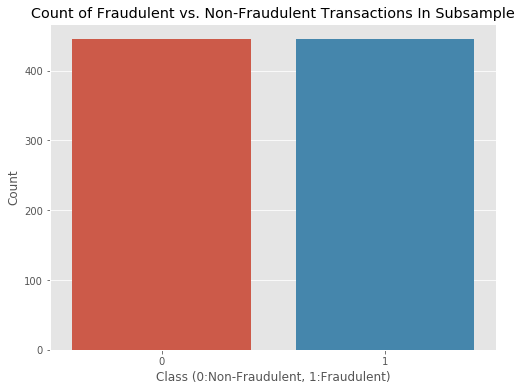

In [26]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [27]:
#taking a look at correlations once more to make sure we have not biased these variables
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.435
V2             0.489
V3            -0.565
V4             0.702
V5            -0.381
V6            -0.388
V7            -0.472
V8             0.054
V9            -0.537
V10           -0.623
V11            0.687
V12           -0.682
V13           -0.081
V14           -0.748
V15           -0.071
V16           -0.598
V17           -0.557
V18           -0.473
V19            0.267
V20            0.155
V21            0.142
V22           -0.019
V23           -0.031
V24           -0.040
V25            0.034
V26            0.070
V27            0.085
V28            0.091
Class          1.000
scaled_amount  0.081
scaled_time   -0.163

### Outlier Detection & Removal
Outlier detection is a complex topic. The trade-off between reducing the number of transactions and thus volume of information available to my algorithms and having extreme outliers skew the results of your predictions is not easily solvable and highly depends on your data and goals. 

In this case, focus exclusively on features with a correlation of 0.5 or higher with the class variable for outlier removal. Before getting into the actual outlier removal, let’s take a look at visualizations of those features:

In [28]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.565
V9  -0.537
V10 -0.623
V12 -0.682
V14 -0.748
V16 -0.598
V17 -0.557

In [29]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.702
V11    0.687
Class  1.000

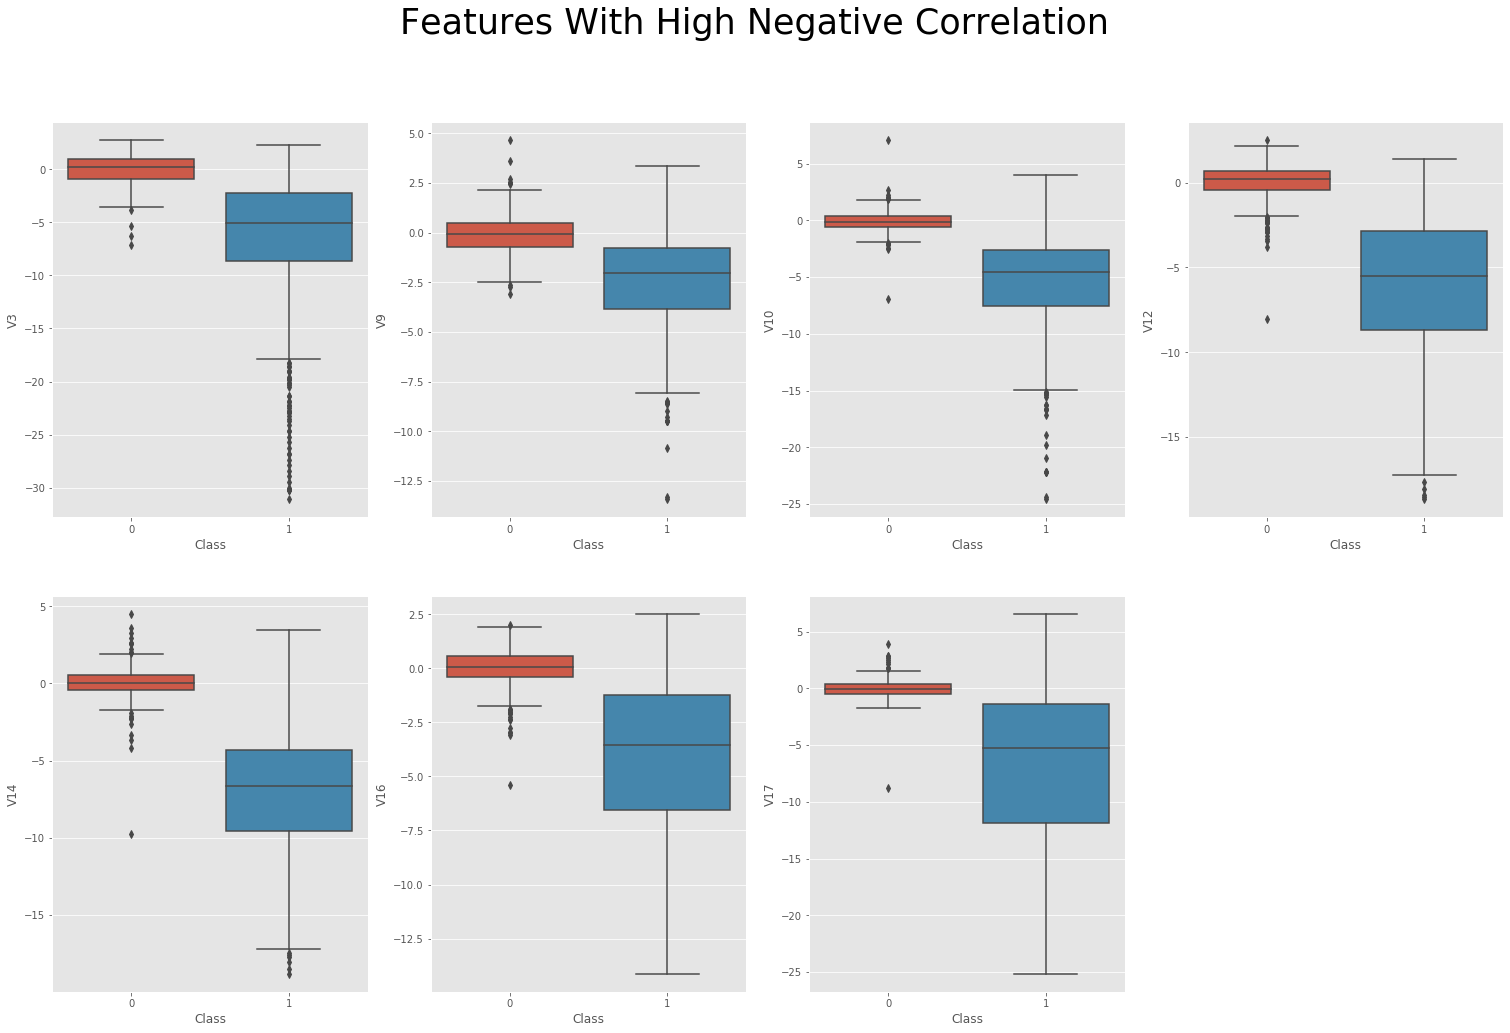

In [30]:
#visualizing the features w high negative correlation and also outliers using boxplots
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

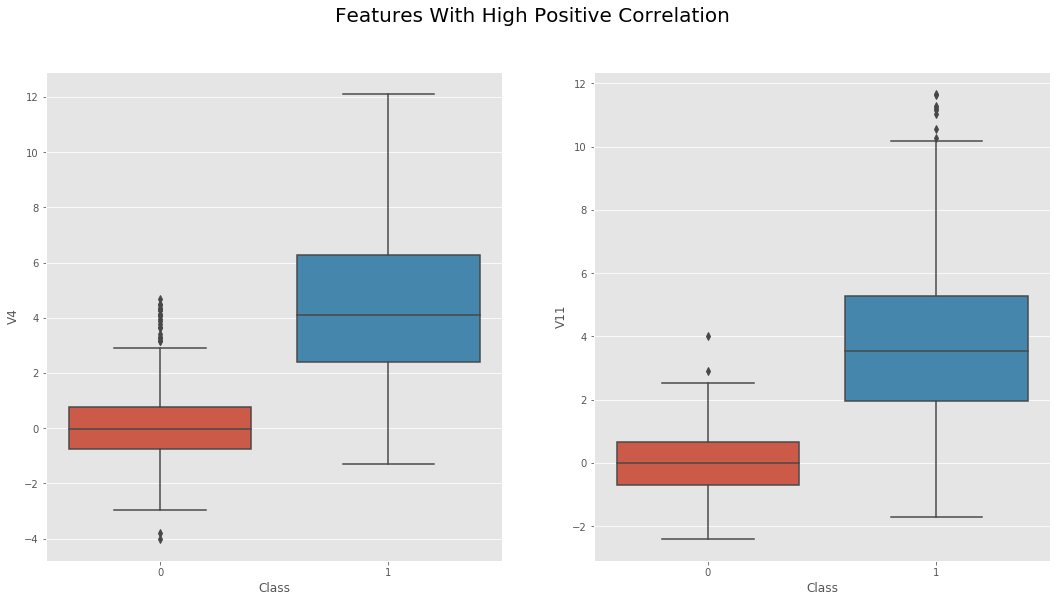

In [31]:
#visualizing the features w high positive correlation and outliers with boxplots
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

#### Extreme Outlier Removal
Box plots provide us with a good intuition of whether we need to worry about outliers as all transactions outside of 1.5 times the IQR (Inter-Quartile Range) are usually considered to be outliers. 

However, removing all transactions outside of 1.5 times the IQR would dramatically decrease our training data size, which is not very large, to begin with. Thus, I decided to only focus on extreme outliers outside of 2.5 times the IQR.

In [33]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [34]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 890 transactions by 272 transactions to 618 transactions.


#### Dimensionality Reduction

#### With t-SNE for Visualization
Visualizing our classes would prove to be quite interesting and show us if they are clearly separable. However, it is not possible to produce a 30-dimensional plot using all of our predictors. Instead, using a dimensionality reduction technique such as t-SNE, we are able to project these higher dimensional distributions into lower-dimensional visualizations.

Projecting our data set into a two-dimensional space, we are able to produce a scatter plot showing the clusters of fraudulent and non-fraudulent transactions:

In [35]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [36]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

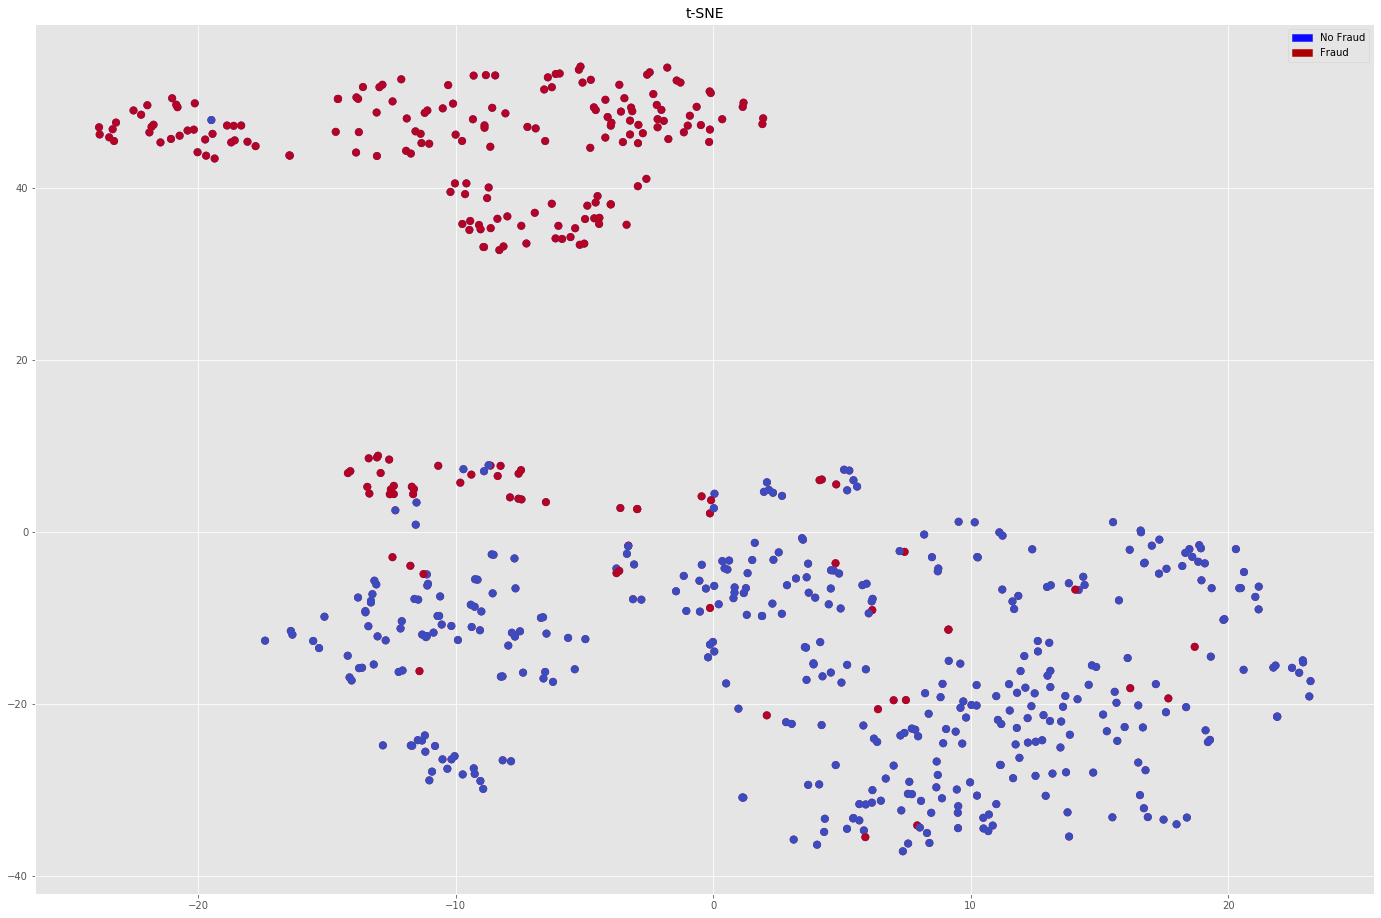

In [37]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

### Finally!! Classifications Algorithms

Modelling training data using machine learning algorithms. Used 80/20 train-test split, splitting balanced data set into two pieces. 

To avoid overfitting, use the very common resampling techniue k-fold cross-validation. That is: separate your training data into k parts (folds) and then fit your model on k-1 folds before making predictions for the kth hold-out fold. You then repeat this process for every single fold and average the resulting predictions.

To get a better feeling of which algorithm would perform best on our data, let’s quickly spot-check some of the most popular classification algorithms:
1. Logistic Regression
2. Linear Discriminant Analysis
3. K Nearest Neighbors (KNN)
4. Classification Trees
5. Support Vector Classifier
6. Random Forest Classifier
7. XGBoost Classifier

The results of model ROC-AUC is mean of all 10 slipts will be printed first. It can later be visualized to check how consistently these models predict over the multiple folds iterations. In this case we will use 10 fold cross validation. The best model will give most consistently good ROC-AUC scores.

#### Model building Step 1: Create Train Test Split

In [38]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [39]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [41]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (494, 30) (124, 30) 

Y_shapes:
 Y_train: Y_validation:
 (494,) (124,)


#### Step 2: Loading 7 models from scikit learn

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Run the models ie. fit to training data
# Check & print ROC-AUC scores
## Spot-Checking Algorithms scores

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models using a k fold cross validation with 10 slipts

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.975082 (0.016375)
LDA: 0.970175 (0.019572)
KNN: 0.954494 (0.033327)
CART: 0.910841 (0.042247)
SVM: 0.979220 (0.013314)
XGB: 0.969714 (0.019195)
RF: 0.968411 (0.021943)


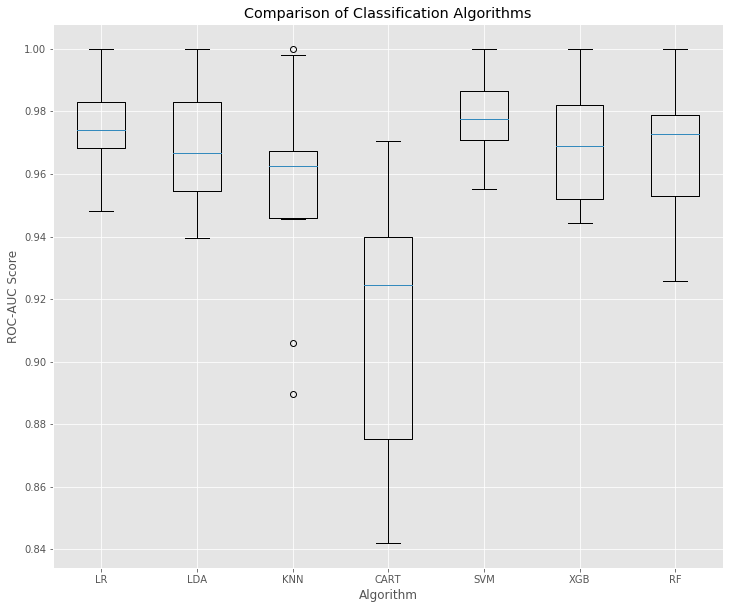

In [45]:
#Compare Algorithms using box plots

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

As we can see, there are a few algorithms that quite significantly outperformed the others. Now, what algorithm do we choose? As mentioned above, this project had not only the focus of achieving the highest accuracy but also to create business value. 

Therefore, choosing Random Forest over XGBoost might be a reasonable approach in order to achieve a higher degree of comprehensiveness while only slightly decreasing performance. To further illustrate what I mean by this, here is a visualization of our Random Forest model that could easily be used to explain very simply why a certain decision was made:

In [46]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Conclusion & Future Work
Fraud detection is a complex issue that requires a substantial amount of planning before throwing machine learning algorithms at it. Nonetheless, it is also an application of data science and machine learning for the good, which makes sure that the customer’s money is safe and not easily tampered with.

Future work will include a comprehensive tuning of the Random Forest algorithm I talked about earlier. Having a data set with non-anonymized features would make this particularly interesting as outputting the feature importance would enable one to see what specific factors are most important for detecting fraudulent transactions.